Judul Project : Segmentasi Individu Berdasarkan Pola Kesehatan dan Tidur Menggunakan K-Means Clustering
Nama : Viola Salsha Billa
NIM : A11.2022.14524
Mata Kuliah : Pembelajaran Mesin
Kelompok : A11.4419


Ringkasan dan Rumusan Masalah
Penelitian ini akan menggunakan teknik clustering untuk mengelompokkan individu berdasarkan pola kesehatan dan tidur mereka. Dengan menggunakan dataset yang berisi informasi seperti durasi tidur, kualitas tidur, tingkat aktivitas fisik, tingkat stres, dan indikator kesehatan lainnya, algoritma clustering akan digunakan untuk mengelompokkan individu ke dalam kelompok-kelompok yang memiliki pola kesehatan dan tidur yang sebanding. Hasil dari segmentasi ini akan menunjukkan bahwa orang-orang dalam kelompok ini memiliki pola kesehatan dan tidur yang sebanding.
Penelitian ini bertujuan untuk mengelompokkan individu berdasarkan pola kesehatan dan tidur mereka dengan menggunakan teknik clustering. Rumusan masalah utama dari penelitian ini adalah bagaimana cara mengelompokkan individu berdasarkan faktor-faktor kesehatan dan tidur yang ada dalam dataset, serta teknik clustering apa yang paling sesuai untuk mencapai hasil yang optimal. Dengan memahami karakteristik masing-masing cluster, diharapkan dapat dikembangkan strategi kesehatan yang lebih terarah dan personal, meningkatkan kesejahteraan individu melalui penyesuaian gaya hidup dan intervensi yang sesuai dengan pola kesehatan dan tidur yang teridentifikasi.


Tujuan
1.	Mengidentifikasi Teknik Clustering yang Optimal
2.	Mengidentifikasi Faktor Kesehatan yang Mempengaruhi Clustering
3.	Mengembangkan Rekomendasi Kesehatan Berdasarkan Hasil Clustering


Model / Alur
Penyelesaian


Penjelasan Dataset
Dataset Kesehatan dan Gaya Hidup Tidur terdiri dari 400 baris dan 13 kolom, yang mencakup berbagai variabel yang terkait dengan tidur dan kebiasaan sehari-hari. Data ini mencakup rincian seperti jenis kelamin, usia, pekerjaan, durasi tidur, kualitas tidur, tingkat aktivitas fisik, tingkat stres, kategori BMI, tekanan darah, detak jantung, jumlah langkah setiap hari, dan ada tidaknya gangguan tidur.

Dataset Columns:

Person ID: Pengenal untuk setiap individu.
Gender: Jenis kelamin orang tersebut (Pria/Wanita).
Age:  Usia orang tersebut dalam tahun.
Occupation: Pekerjaan atau profesi orang tersebut.
Sleep Duration (hours): Jumlah jam orang tersebut tidur per hari.
Quality of Sleep (scale: 1-10): Penilaian subjektif dari kualitas tidur, mulai dari 1 hingga 10.
Physical Activity Level (minutes/day): Jumlah menit orang tersebut melakukan aktivitas fisik setiap hari.
Stress Level (scale: 1-10): Penilaian subjektif dari tingkat stres yang dialami oleh orang tersebut, mulai dari 1 hingga 10.
Kategori BMI: Kategori BMI orang tersebut (misalnya, Berat Badan Kurang, Normal, Berat Badan Berlebih).
Blood Pressure (systolic/diastolic):  Pengukuran tekanan darah seseorang, yang ditunjukkan sebagai tekanan sistolik dibandingkan tekanan diastolik.
Heart Rate (bpm): Denyut jantung istirahat seseorang dalam denyut per menit.
Daily Steps:  Jumlah langkah yang dilakukan seseorang per hari.
Sleep Disorder: Ada atau tidaknya gangguan tidur pada orang tersebut (Tidak Ada, Insomnia, Sleep Apnea).

Exploratory Data Analysis (EDA) dan Features

In [14]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Menampilkan informasi umum tentang dataset
print(df.info())

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
   Person ID Gend

In [15]:
# Menghitung statistik deskriptif untuk fitur numerik
print(df.describe())

# Menghitung statistik deskriptif untuk fitur kategorikal
print(df.describe(include=['object']))

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

Tahap pra-pemrosesan data untuk memastikan bahwa analisis dan model yang dibuat tidak terpengaruh oleh nilai yang hilang atau data duplikat yang bisa mempengaruhi hasil analisis dan performa model.

In [17]:
# Memeriksa missing values
print(df.isnull().sum())

# Memeriksa duplikat
print(df.duplicated().sum())

# Menghapus duplikat jika ada
df = df.drop_duplicates()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
0


 Memisahkan kolom yang berisi data tekanan darah yang digabungkan menjadi dua kolom terpisah dan memperbarui daftar fitur numerik. Karena pada nilai kolom Blood Pressure dapat diolah

In [21]:
# Pisahkan tekanan darah menjadi dua kolom
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df.drop('Blood Pressure', axis=1, inplace=True)
num_features = [f for f in num_features if f != 'Blood Pressure']
num_features.extend(['Systolic BP', 'Diastolic BP'])

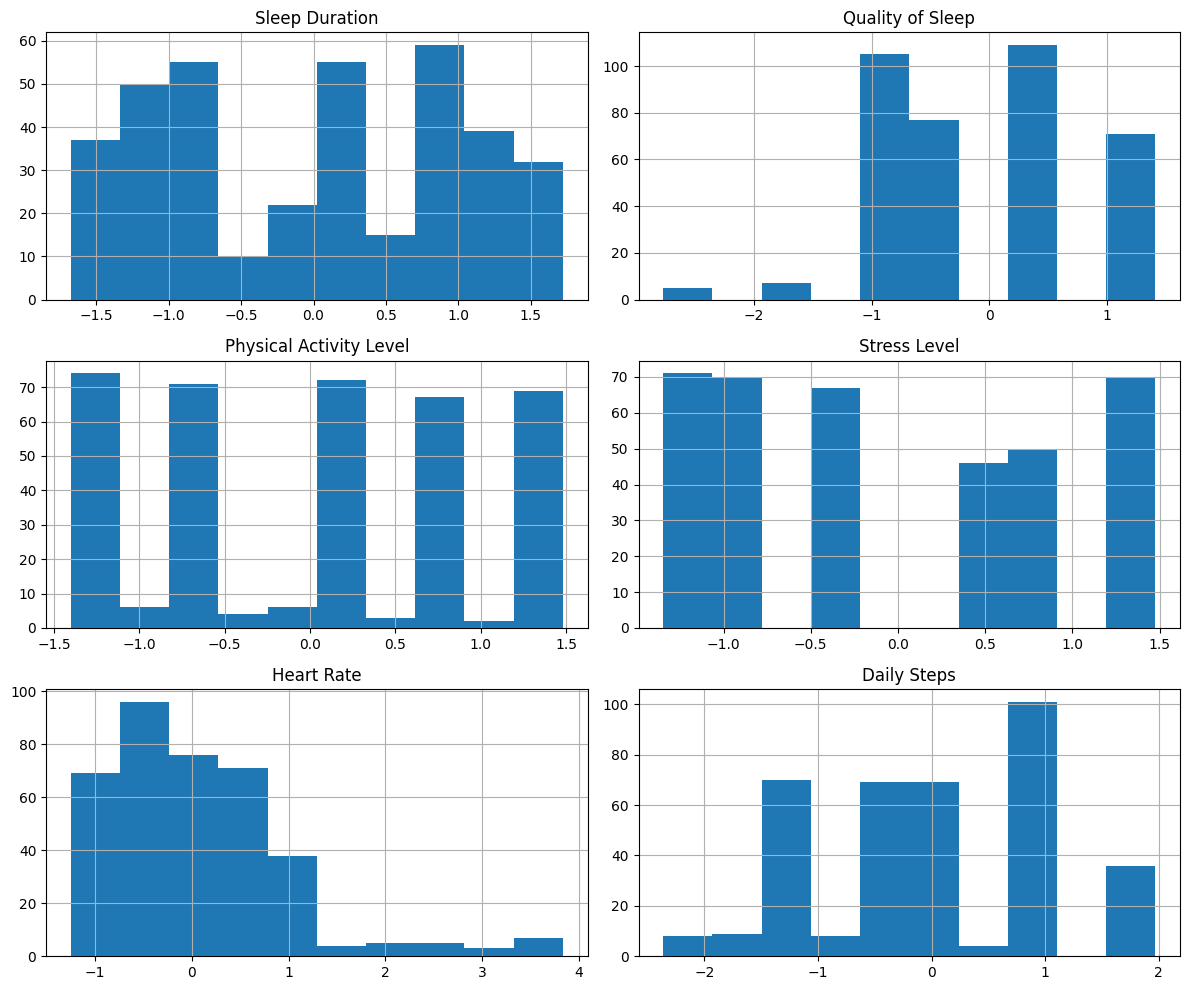

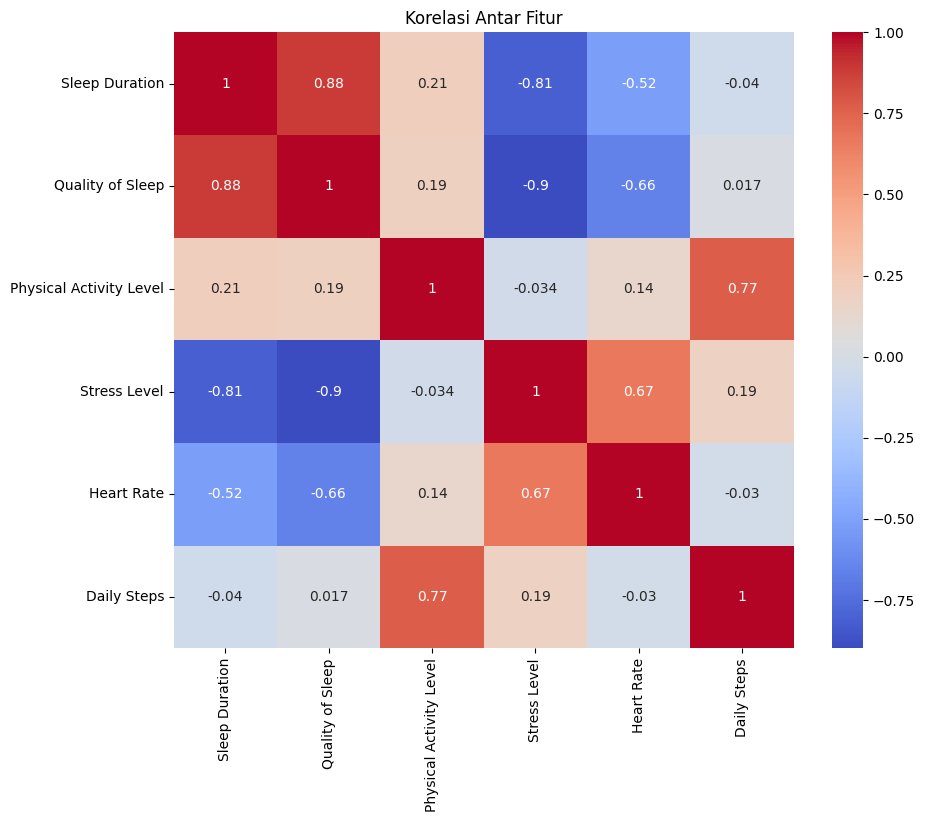

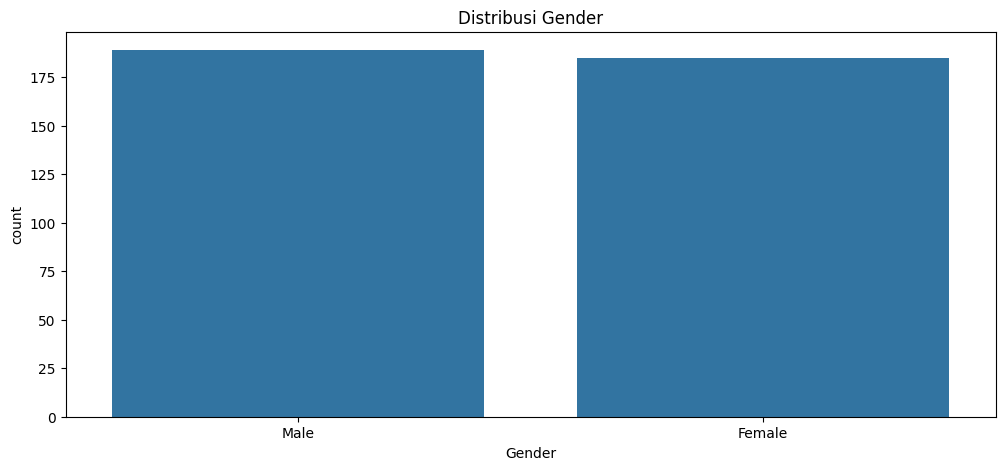

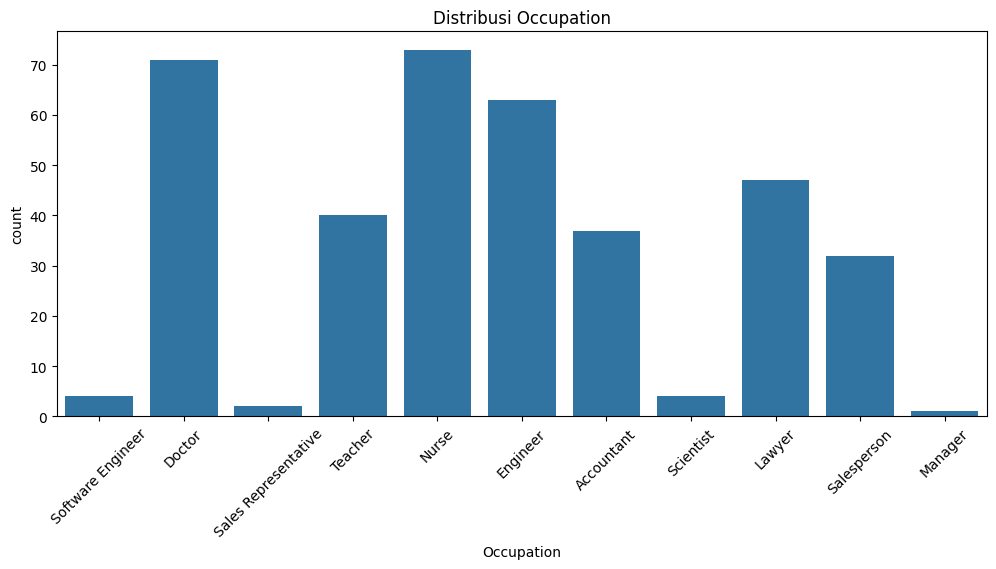

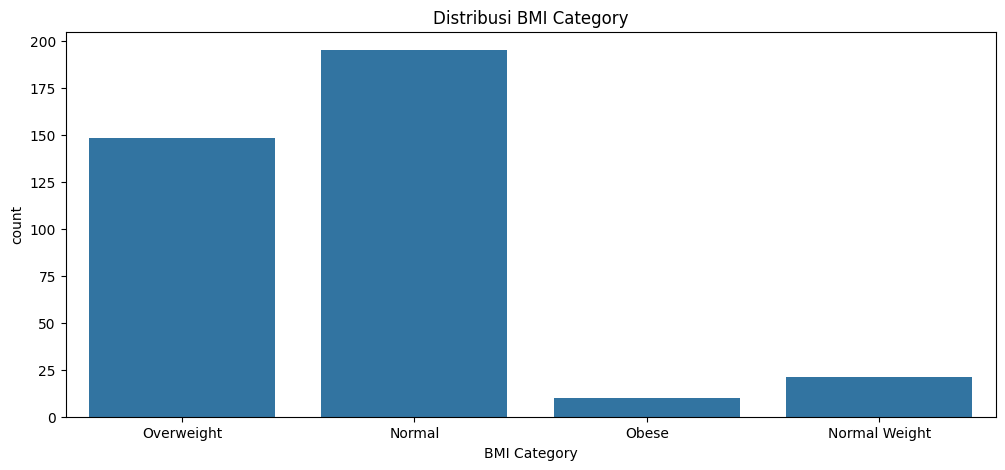

In [60]:
# Distribusi fitur numerik
df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
    'Stress Level', 'Heart Rate', 'Daily Steps']].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Korelasi antara fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
    'Stress Level', 'Heart Rate', 'Daily Steps']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

# Distribusi kategori Gender dan Occupation
plt.figure(figsize=(12, 5))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x='Occupation', data=df)
plt.title('Distribusi Occupation')
plt.xticks(rotation=45)
plt.show()

# Distribusi kategori BMI Category
plt.figure(figsize=(12, 5))
sns.countplot(x='BMI Category', data=df)
plt.title('Distribusi BMI Category')
plt.show()

Tahap ini menampilkan korelasi antar kolom yang ada pada dataset. Hal ini untuk memvisualisasikan kategori dataset yang akan digunakan nanti

In [42]:
# Normalisasi fitur numerik
scaler = StandardScaler()
df_encoded[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Heart Rate', 'Daily Steps']] = scaler.fit_transform(
    df_encoded[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Heart Rate', 'Daily Steps']]
)

Normalisasi fitur numerik adalah langkah penting dalam preprocessing data sebelum diterapkan pada model machine learning. Normalisasi memastikan bahwa fitur numerik memiliki rentang yang sama atau distribusi yang seragam, yang dapat membantu dalam meningkatkan kinerja dan stabilitas model.

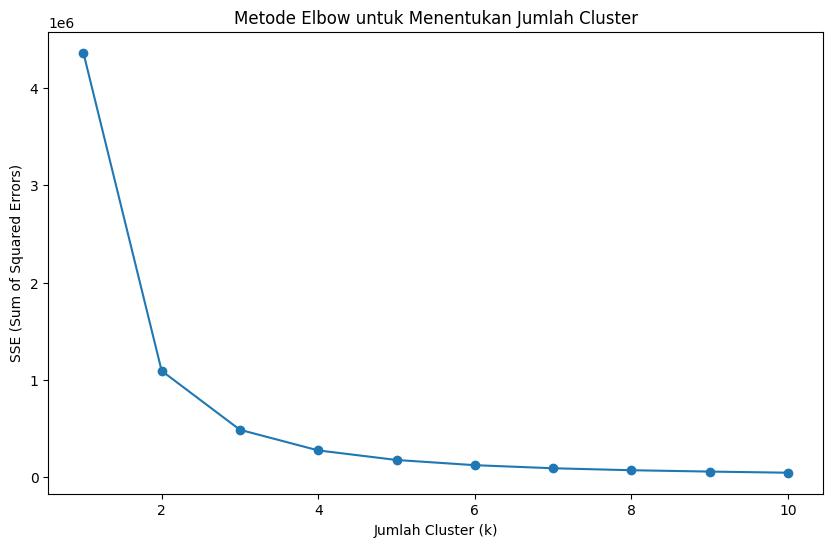

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)
# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

Metode "elbow" adalah teknik lain yang digunakan untuk menentukan jumlah cluster yang optimal dalam algoritma K-Means clustering. Metode ini melibatkan plotting jumlah cluster terhadap nilai inertia (atau sum of squared distances) dan mencari "siku" (elbow) dalam plot tersebut. Elbow adalah titik di mana penurunan inertia mulai melambat saat menambah jumlah cluster. nilai yang akan digunakan adalah 2

In [64]:
# Encoding fitur kategorikal
df_encoded = pd.get_dummies(df, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
df_encoded[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Heart Rate', 'Daily Steps']] = scaler.fit_transform(
    df_encoded[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Heart Rate', 'Daily Steps']]
)
# Menyimpan data yang sudah diproses
df_processed.to_csv('Sleep_health_and_lifestyle_dataset.csv', index=False)



Normalisasi fitur numerik adalah proses mengubah skala nilai-nilai fitur dalam dataset sehingga mereka berada dalam rentang tertentu atau memiliki distribusi tertentu. Ini penting dalam banyak algoritma machine learning, seperti K-Means clustering, yang sensitif terhadap skala fitur.

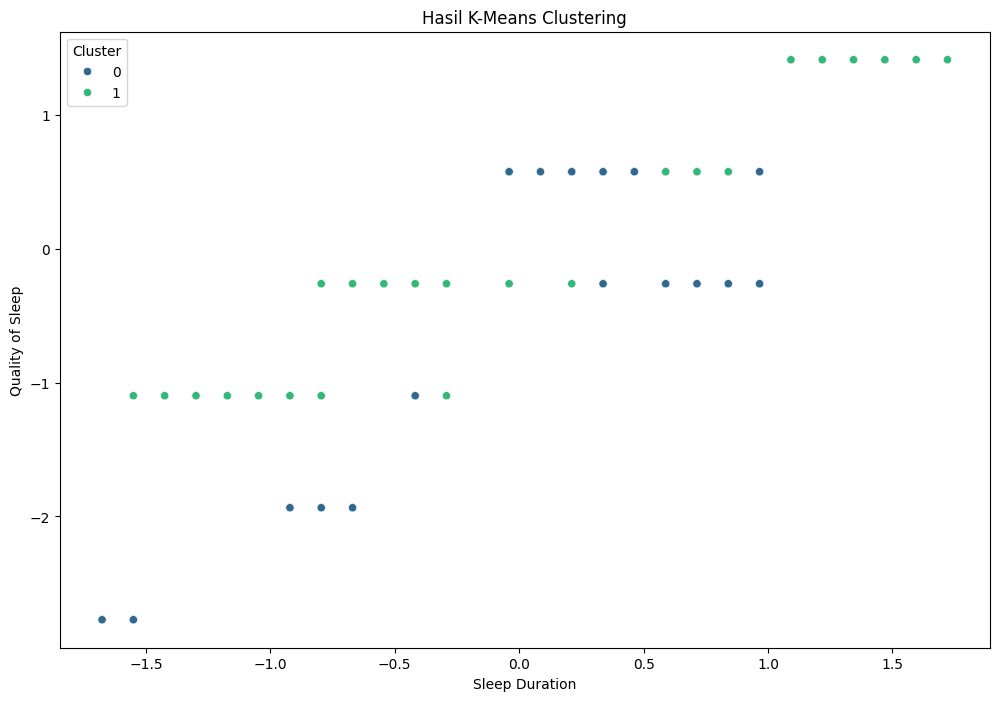

In [86]:
# Terapkan K-Means dengan jumlah cluster yang optimal (misalnya k=2)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

# Tampilkan hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Cluster', palette='viridis', data=df_encoded)
plt.title('Hasil K-Means Clustering')
plt.show()

Sumbu X menunjukkan durasi tidur yang telah dinormalisasi. Nilai yang lebih tinggi menunjukkan durasi tidur yang lebih lama, sementara nilai yang lebih rendah menunjukkan durasi tidur yang lebih pendek. Sumbu Y menunjukkan kualitas tidur yang telah dinormalisasi.
Nilai yang lebih tinggi menunjukkan kualitas tidur yang lebih baik, sementara nilai yang lebih rendah menunjukkan kualitas tidur yang lebih buruk. Cluster 0 (Biru) tampaknya terdiri dari individu-individu dengan durasi tidur yang bervariasi dan sebagian besar memiliki kualitas tidur yang lebih rendah. Cluster 1 (Hijau) tampaknya terdiri dari individu-individu dengan durasi tidur yang lebih konsisten dan sebagian besar memiliki kualitas tidur yang lebih baik. Dari hasil ini, kita dapat melihat bahwa ada dua kelompok utama dalam data berdasarkan durasi tidur dan kualitas tidur.

In [79]:
# Langkah 3: Terapkan model K-Means
kmeans = KMeans(n_clusters=3, random_state=0)  # Ganti n_clusters dengan jumlah klaster yang diinginkan
df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
    'Stress Level', 'Heart Rate', 'Daily Steps']]
df['Cluster'] = kmeans.fit_predict(df_encoded)

# Langkah 4: Cek hasil
print(df.head())

        Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0 -1.753096       -1.298887         -1.098280                -0.825418   
1 -1.637643       -1.173036         -1.098280                 0.039844   
2 -1.637643       -1.173036         -1.098280                 0.039844   
3 -1.637643       -1.550588         -2.771424                -1.402260   
4 -1.637643       -1.550588         -2.771424                -1.402260   

   Stress Level  Heart Rate  Daily Steps  Systolic BP  Diastolic BP  \
0      0.347021    1.654719    -1.619584    -0.330002     -0.268102   
1      1.475592    1.170474     1.970077    -0.459239     -0.755640   
2      1.475592    1.170474     1.970077    -0.459239     -0.755640   
3      1.475592    3.591698    -2.362273     1.479309      0.869486   
4      1.475592    3.591698    -2.362273     1.479309      0.869486   

   Systolic BP.1  ...  Occupation_Scientist  Occupation_Software Engineer  \
0      -0.330002  ...                   0.0        

In [80]:
X = df[['Systolic BP', 'Diastolic BP']]
y = df['Cluster'] # Langkah 1: Deklarasi variabel X (fitur) dan y (label sebenarnya)
# Jika Anda tidak memiliki label sebenarnya, Anda dapat melewatkan langkah ini
X = df[['Systolic BP', 'Diastolic BP']]
y = df['Cluster']  # Misalkan 'Cluster' adalah label sebenarnya jika ada

# Langkah 2: Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Langkah 3: Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Langkah 4: Terapkan model K-Means
kmeans = KMeans(n_clusters=3, random_state=0)  # Ganti n_clusters dengan jumlah klaster yang diinginkan
kmeans.fit(X_train_scaled)

# Tambahkan hasil klasterisasi pada set pengujian
y_pred = kmeans.predict(X_test_scaled)

Silhouette Score: 0.67
Homogeneity Score: 0.43
V-Measure Score: 0.44


Test ini dilakukan pada salah satu dataset. Hasil 0.67 menunjukkan bahwa clustering yang dihasilkan cukup baik. Data poin sebagian besar dekat dengan pusat cluster mereka masing-masing. Hasil 0.43 menunjukkan bahwa ada beberapa campuran kelas dalam cluster yang terbentuk. Clustering belum sepenuhnya homogen. Hasil 0.44 menunjukkan bahwa clustering memiliki keseimbangan moderat antara homogeneity dan completeness.

Skor Silhouette sebesar 0.67 menunjukkan bahwa cluster yang dihasilkan cukup baik dan memiliki pemisahan yang relatif jelas.
Nilai ini mengindikasikan bahwa objek dalam cluster cukup mirip satu sama lain dan lebih berbeda dari objek di cluster lain.
Skor ini adalah tanda bahwa metode clustering yang digunakan memberikan hasil yang memadai dan cluster yang terbentuk terpisah dengan baik.